# ÏôÄÏù∏ Í∞ÄÍ≤© ÎÖºÎ¶¨Ï†ÅÏù∏ Í∞ÄÍ≤©Ïù∏Í∞Ä?
- Îî•Îü¨Îãù Í≥ºÏ†ïÏù¥ Îì§Ïñ¥Í∞ÄÏïº ÌïòÎäî Îç∞Ïù¥ÌÑ∞
- ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨Î•º Ïñ¥ÎñªÍ≤å ÌïòÎäêÎÉêÏóê Îî∞Îùº ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏Ïù¥ Îã¨ÎùºÏßê.
- ÎùºÎ≤®Ïù∏ÏΩîÎçî,ÏõêÌï´Ïù∏ÏΩîÎçî = ÏÑ§Î™ÖÎ†•Ïù¥ 0.8, RMSEÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥.

In [1]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌïòÍ∏∞ ÏúÑÌï¥ KMeans Í∞ÄÏ†∏Ïò¥. 

from sklearn.metrics import mean_squared_error, r2_score
# ÏÑ†ÌòïÌöåÍ∑ÄÏóêÏÑú Í∞ÄÏû• Ï§ëÏöîÌïú ÏßÄÌëú, RMSE, R2 score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
# polynomia : Ïª¨ÎüºÎì§ÏùÑ Îã§Ìï≠ÌöåÍ∑ÄÏö©ÏúºÎ°ú ÎßåÎì§Ïñ¥Ï§å.

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ìïú ÌõÑÏóê, ÏãúÍ∞ÅÌôî Ìï† Îïå Îú®Îäî TSNE

from kneed import KneeLocator
from scipy.stats import f_oneway
from itertools import combinations

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.options.display.max_columns = 99
df = pd.read_csv('cleansingWine.csv')
df.isna().sum()
# numÍ∞íÏù¥ ÎÑàÎ¨¥ ÎßéÎã§.

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/932850037.py:2: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleansingWine.csv')


Unnamed: 0         0
id                 0
name               0
producer           0
nation             2
local1           900
local2         10460
local3         18014
local4         21603
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
varieties7     21574
varieties8     21587
varieties9     21598
varieties10    21599
varieties11    21600
varieties12    21601
type              58
use               14
abv             7146
degree          7145
sweet              2
acidity           13
body              13
tannin            13
price              0
year               0
ml                 0
dtype: int64

In [3]:
# Ï†ÑÏ≤¥ Ï§ë 80% Ïù¥ÏÉÅÏù¥ Í≤∞Ï∏°ÏπòÎ©¥ Ï†úÍ±∞ÌïòÍ∏∞Î°ú Ìï®.
isnan_df = df.isna().sum() / len(df) <= 0.2
isnan_df
# Ïó¨Í∏∞ÏÑú FalseÎ°ú Îú¨ Ïª¨ÎüºÎì§ÏùÄ nanÍ∞íÏù¥ ÎßéÏùÄ Í≤É. Ï†úÍ±∞Ìï¥Ï§òÏïº Ìï®.

Unnamed: 0      True
id              True
name            True
producer        True
nation          True
local1          True
local2         False
local3         False
local4         False
varieties1      True
varieties2     False
varieties3     False
varieties4     False
varieties5     False
varieties6     False
varieties7     False
varieties8     False
varieties9     False
varieties10    False
varieties11    False
varieties12    False
type            True
use             True
abv            False
degree         False
sweet           True
acidity         True
body            True
tannin          True
price           True
year            True
ml              True
dtype: bool

In [4]:
isnan_df.index

Index(['Unnamed: 0', 'id', 'name', 'producer', 'nation', 'local1', 'local2',
       'local3', 'local4', 'varieties1', 'varieties2', 'varieties3',
       'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8',
       'varieties9', 'varieties10', 'varieties11', 'varieties12', 'type',
       'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml'],
      dtype='object')

In [5]:
isnan_df.index[isnan_df].to_list()
# TrueÏù∏ Í≤ÉÎì§Îßå Í≥®ÎùºÏÑú ÎÇòÏò®Îã§.

['Unnamed: 0',
 'id',
 'name',
 'producer',
 'nation',
 'local1',
 'varieties1',
 'type',
 'use',
 'sweet',
 'acidity',
 'body',
 'tannin',
 'price',
 'year',
 'ml']

In [6]:
isnan_columns = isnan_df.index[isnan_df].to_list()
isnan_columns
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏñºÎßà ÏóÜÎäî Ïª¨Îüº Î¶¨Ïä§Ìä∏Îßå Í±∏Îü¨Ï†∏ ÎÇòÏò®Îã§.

['Unnamed: 0',
 'id',
 'name',
 'producer',
 'nation',
 'local1',
 'varieties1',
 'type',
 'use',
 'sweet',
 'acidity',
 'body',
 'tannin',
 'price',
 'year',
 'ml']

In [7]:
df = df[isnan_columns].drop(['Unnamed: 0','id','name'],axis=1)
df
# nameÍ≥º producerÍ∞Ä Ïú†ÏÇ¨Ìï¥ÏÑú name Ïª¨ÎüºÎèÑ Î∫ÄÎã§.

producer                        nation  \
0                    Altair                         Chile   
1                    Altair                         Chile   
2              Baron du Val                        France   
3              Baron du Val                        France   
4                  Benziger                           USA   
...                     ...                           ...   
21600  Besserat de Bellefon                        France   
21601         Leopards Leap  the Republic of South Africa   
21602         Leopards Leap  the Republic of South Africa   
21603         Leopards Leap  the Republic of South Africa   
21604         Leopards Leap  the Republic of South Africa   

                    local1          varieties1       type                 use  \
0             Rapel Valley  Cabernet Sauvignon        Red               Table   
1             Rapel Valley  Cabernet Sauvignon        Red               Table   
2                      NaN            Carignan        Red               Table   
3                      NaN            Carignan      White               Table   
4               California  Cabernet Sauvignon        Red               Table   
...                    ...                 ...        ...                 ...   
21600            Champagne       Pinot Meunier  Sparkling    Appetizer, Table   
21601       Coastal Region          Chardonnay  Sparkling    Appetizer, Table   
21602         Western Cape          Chardonnay       Rose    Appetizer, Table   
21603       Coastal Region          Chardonnay      White    Appetizer, Table   
21604  Breede River Valley              Muscat       Rose  Appetizer, Dessert   

        sweet   acidity   body   tannin   price  year   ml  
0      SWEET1  ACIDITY4  BODY5  TANNIN4  220000  2014  750  
1      SWEET1  ACIDITY3  BODY4  TANNIN4  110000  2016  750  
2      SWEET2  ACIDITY3  BODY2  TANNIN2       0     0  750  
3      SWEET1  ACIDITY3  BODY2  TANNIN1       0     0  750  
4      SWEET1  ACIDITY3  BODY3  TANNIN4       0  2003  750  
...       ...       ...    ...      ...     ...   ...  ...  
21600  SWEET1  ACIDITY5  BODY2  TANNIN1  128000     0  750  
21601  SWEET1  ACIDITY5  BODY2  TANNIN1   40000     0  750  
21602  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21603  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21604  SWEET3  ACIDITY3  BODY3  TANNIN1   55000  2019  750  

[21605 rows x 13 columns]

In [8]:
df.isna().sum()
# Í∑∏ÎûòÎèÑ Ïó¨Ï†ÑÌûà nanÍ∞íÏù¥ ÏûàÎã§.
# ÏµúÎπàÍ∞íÏúºÎ°ú Ï±ÑÏö∞Îäî Í≤å ÎßûÎäî ÎÖºÎ¶¨ÏùºÍπå?
# ÏûÑÏùòÏ†ÅÏúºÎ°ú ÎÑ£ÎäîÍ±∞Î©¥ Î™®Îç∏Ïóê Ïïà Ï¢ãÏùÄ ÏòÅÌñ•ÏùÑ Ï§Ñ Í≤ÉÏù¥Îã§.

producer        0
nation          2
local1        900
varieties1    349
type           58
use            14
sweet           2
acidity        13
body           13
tannin         13
price           0
year            0
ml              0
dtype: int64

In [9]:
df = df.dropna()
# Í≤∞Ï∏°Ïπò Í∑∏ÎÉ• Ï†úÍ±∞Ìï¥Î≤ÑÎ†§
df

producer                        nation  \
0                    Altair                         Chile   
1                    Altair                         Chile   
4                  Benziger                           USA   
5                    Calvet                        France   
6                    Calvet                        France   
...                     ...                           ...   
21600  Besserat de Bellefon                        France   
21601         Leopards Leap  the Republic of South Africa   
21602         Leopards Leap  the Republic of South Africa   
21603         Leopards Leap  the Republic of South Africa   
21604         Leopards Leap  the Republic of South Africa   

                    local1          varieties1       type                 use  \
0             Rapel Valley  Cabernet Sauvignon        Red               Table   
1             Rapel Valley  Cabernet Sauvignon        Red               Table   
4               California  Cabernet Sauvignon        Red               Table   
5                Bourgogne               Gamay        Red               Table   
6                 Bordeaux              Merlot        Red               Table   
...                    ...                 ...        ...                 ...   
21600            Champagne       Pinot Meunier  Sparkling    Appetizer, Table   
21601       Coastal Region          Chardonnay  Sparkling    Appetizer, Table   
21602         Western Cape          Chardonnay       Rose    Appetizer, Table   
21603       Coastal Region          Chardonnay      White    Appetizer, Table   
21604  Breede River Valley              Muscat       Rose  Appetizer, Dessert   

        sweet   acidity   body   tannin   price  year   ml  
0      SWEET1  ACIDITY4  BODY5  TANNIN4  220000  2014  750  
1      SWEET1  ACIDITY3  BODY4  TANNIN4  110000  2016  750  
4      SWEET1  ACIDITY3  BODY3  TANNIN4       0  2003  750  
5      SWEET2  ACIDITY4  BODY2  TANNIN2       0  2007  750  
6      SWEET1  ACIDITY3  BODY4  TANNIN3       0  2003  750  
...       ...       ...    ...      ...     ...   ...  ...  
21600  SWEET1  ACIDITY5  BODY2  TANNIN1  128000     0  750  
21601  SWEET1  ACIDITY5  BODY2  TANNIN1   40000     0  750  
21602  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21603  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21604  SWEET3  ACIDITY3  BODY3  TANNIN1   55000  2019  750  

[20364 rows x 13 columns]

In [10]:
df.isna().sum()
# Ïù¥Ï†ú Í≤∞Ï∏°Ïπò Îã§ Ï≤òÎ¶¨ÎêêÎã§.

producer      0
nation        0
local1        0
varieties1    0
type          0
use           0
sweet         0
acidity       0
body          0
tannin        0
price         0
year          0
ml            0
dtype: int64

In [11]:
df

producer                        nation  \
0                    Altair                         Chile   
1                    Altair                         Chile   
4                  Benziger                           USA   
5                    Calvet                        France   
6                    Calvet                        France   
...                     ...                           ...   
21600  Besserat de Bellefon                        France   
21601         Leopards Leap  the Republic of South Africa   
21602         Leopards Leap  the Republic of South Africa   
21603         Leopards Leap  the Republic of South Africa   
21604         Leopards Leap  the Republic of South Africa   

                    local1          varieties1       type                 use  \
0             Rapel Valley  Cabernet Sauvignon        Red               Table   
1             Rapel Valley  Cabernet Sauvignon        Red               Table   
4               California  Cabernet Sauvignon        Red               Table   
5                Bourgogne               Gamay        Red               Table   
6                 Bordeaux              Merlot        Red               Table   
...                    ...                 ...        ...                 ...   
21600            Champagne       Pinot Meunier  Sparkling    Appetizer, Table   
21601       Coastal Region          Chardonnay  Sparkling    Appetizer, Table   
21602         Western Cape          Chardonnay       Rose    Appetizer, Table   
21603       Coastal Region          Chardonnay      White    Appetizer, Table   
21604  Breede River Valley              Muscat       Rose  Appetizer, Dessert   

        sweet   acidity   body   tannin   price  year   ml  
0      SWEET1  ACIDITY4  BODY5  TANNIN4  220000  2014  750  
1      SWEET1  ACIDITY3  BODY4  TANNIN4  110000  2016  750  
4      SWEET1  ACIDITY3  BODY3  TANNIN4       0  2003  750  
5      SWEET2  ACIDITY4  BODY2  TANNIN2       0  2007  750  
6      SWEET1  ACIDITY3  BODY4  TANNIN3       0  2003  750  
...       ...       ...    ...      ...     ...   ...  ...  
21600  SWEET1  ACIDITY5  BODY2  TANNIN1  128000     0  750  
21601  SWEET1  ACIDITY5  BODY2  TANNIN1   40000     0  750  
21602  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21603  SWEET1  ACIDITY3  BODY2  TANNIN1   40000  2020  750  
21604  SWEET3  ACIDITY3  BODY3  TANNIN1   55000  2019  750  

[20364 rows x 13 columns]

## sweet, acidity, body, tannin Ïª¨ÎüºÏùÄ ÏâΩÍ≤å ÏàòÏπòÌòïÎßå ÎπºÏò§Í∏∞

In [12]:
df['sweet'] = df['sweet'].str.extract('(\d+)').astype(int)
df['acidity'] = df['acidity'].str.extract('(\d+)').astype(int)
df['body'] = df['body'].str.extract('(\d+)').astype(int)
df['tannin'] = df['tannin'].str.extract('(\d+)').astype(int)

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/3507342596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sweet'] = df['sweet'].str.extract('(\d+)').astype(int)
/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/3507342596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acidity'] = df['acidity'].str.extract('(\d+)').astype(int)
/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/3507342596.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [13]:
df

producer                        nation  \
0                    Altair                         Chile   
1                    Altair                         Chile   
4                  Benziger                           USA   
5                    Calvet                        France   
6                    Calvet                        France   
...                     ...                           ...   
21600  Besserat de Bellefon                        France   
21601         Leopards Leap  the Republic of South Africa   
21602         Leopards Leap  the Republic of South Africa   
21603         Leopards Leap  the Republic of South Africa   
21604         Leopards Leap  the Republic of South Africa   

                    local1          varieties1       type                 use  \
0             Rapel Valley  Cabernet Sauvignon        Red               Table   
1             Rapel Valley  Cabernet Sauvignon        Red               Table   
4               California  Cabernet Sauvignon        Red               Table   
5                Bourgogne               Gamay        Red               Table   
6                 Bordeaux              Merlot        Red               Table   
...                    ...                 ...        ...                 ...   
21600            Champagne       Pinot Meunier  Sparkling    Appetizer, Table   
21601       Coastal Region          Chardonnay  Sparkling    Appetizer, Table   
21602         Western Cape          Chardonnay       Rose    Appetizer, Table   
21603       Coastal Region          Chardonnay      White    Appetizer, Table   
21604  Breede River Valley              Muscat       Rose  Appetizer, Dessert   

       sweet  acidity  body  tannin   price  year   ml  
0          1        4     5       4  220000  2014  750  
1          1        3     4       4  110000  2016  750  
4          1        3     3       4       0  2003  750  
5          2        4     2       2       0  2007  750  
6          1        3     4       3       0  2003  750  
...      ...      ...   ...     ...     ...   ...  ...  
21600      1        5     2       1  128000     0  750  
21601      1        5     2       1   40000     0  750  
21602      1        3     2       1   40000  2020  750  
21603      1        3     2       1   40000  2020  750  
21604      3        3     3       1   55000  2019  750  

[20364 rows x 13 columns]

## Î≤îÏ£ºÌòïÏùÄ Ïñ¥ÎñªÍ≤å Ï†ÑÏ≤òÎ¶¨ Ìï†Íπå???
- Î≤îÏ£ºÌòï Î≥ÄÏàò Ï∂ïÏÜå

In [14]:
def reduce_categories(df,columns,n_top):
    for col in columns:
        top_categories = df[col].value_counts().nlargest(n_top).index
        df[col] = df[col].where(df[col].isin(top_categories),'Others')
    return df     # Í∑∏ Í∞íÏù¥ ÏóÜÏúºÎ©¥ 'Others'Î°ú Ï≤òÎ¶¨Ìï¥Îùº. where Îí§ Íµ¨Î¨∏Ïù¥ TrueÎ©¥ ÎÑòÏñ¥Í∞ÑÎã§.

# Ï†ÑÏ≤¥ Ïó¨Îü¨Í∞ÄÏßÄ Ïª¨ÎüºÏóêÏÑú Î™á Î≤à Ï†ÅÏö©ÏùÑ Ìï¥Ïïº ÌïúÎã§.

df

producer                        nation  \
0                    Altair                         Chile   
1                    Altair                         Chile   
4                  Benziger                           USA   
5                    Calvet                        France   
6                    Calvet                        France   
...                     ...                           ...   
21600  Besserat de Bellefon                        France   
21601         Leopards Leap  the Republic of South Africa   
21602         Leopards Leap  the Republic of South Africa   
21603         Leopards Leap  the Republic of South Africa   
21604         Leopards Leap  the Republic of South Africa   

                    local1          varieties1       type                 use  \
0             Rapel Valley  Cabernet Sauvignon        Red               Table   
1             Rapel Valley  Cabernet Sauvignon        Red               Table   
4               California  Cabernet Sauvignon        Red               Table   
5                Bourgogne               Gamay        Red               Table   
6                 Bordeaux              Merlot        Red               Table   
...                    ...                 ...        ...                 ...   
21600            Champagne       Pinot Meunier  Sparkling    Appetizer, Table   
21601       Coastal Region          Chardonnay  Sparkling    Appetizer, Table   
21602         Western Cape          Chardonnay       Rose    Appetizer, Table   
21603       Coastal Region          Chardonnay      White    Appetizer, Table   
21604  Breede River Valley              Muscat       Rose  Appetizer, Dessert   

       sweet  acidity  body  tannin   price  year   ml  
0          1        4     5       4  220000  2014  750  
1          1        3     4       4  110000  2016  750  
4          1        3     3       4       0  2003  750  
5          2        4     2       2       0  2007  750  
6          1        3     4       3       0  2003  750  
...      ...      ...   ...     ...     ...   ...  ...  
21600      1        5     2       1  128000     0  750  
21601      1        5     2       1   40000     0  750  
21602      1        3     2       1   40000  2020  750  
21603      1        3     2       1   40000  2020  750  
21604      3        3     3       1   55000  2019  750  

[20364 rows x 13 columns]

In [15]:
n_top = 20 # ÏÉÅÏúÑ 20Í∞úÍπåÏßÄÎßå Î≥º Í≤É Ïù¥Îã§.
columns = ['producer','nation','local1','varieties1','type','use']
df_reduced = reduce_categories(df,columns,n_top)
df_reduced
# ÌïÑÌÑ∞ÎßÅÌïòÍ≥† Ï†ïÏ†úÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù∏Îç±Ïä§ ÏàúÏÑúÍ∞Ä Îí§Ï£ΩÎ∞ïÏ£ΩÏù¥Îã§.

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/160668626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where(df[col].isin(top_categories),'Others')
/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/160668626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where(df[col].isin(top_categories),'Others')
/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_5542/160668626.py:4: SettingWithCopyWarning: 
A value is trying to be set o

producer                        nation        local1  \
0       Others                         Chile  Rapel Valley   
1       Others                         Chile  Rapel Valley   
4       Others                           USA    California   
5       Others                        France     Bourgogne   
6       Others                        France      Bordeaux   
...        ...                           ...           ...   
21600   Others                        France     Champagne   
21601   Others  the Republic of South Africa        Others   
21602   Others  the Republic of South Africa        Others   
21603   Others  the Republic of South Africa        Others   
21604   Others  the Republic of South Africa        Others   

               varieties1       type                 use  sweet  acidity  \
0      Cabernet Sauvignon        Red               Table      1        4   
1      Cabernet Sauvignon        Red               Table      1        3   
4      Cabernet Sauvignon        Red               Table      1        3   
5                  Others        Red               Table      2        4   
6                  Merlot        Red               Table      1        3   
...                   ...        ...                 ...    ...      ...   
21600              Others  Sparkling    Appetizer, Table      1        5   
21601          Chardonnay  Sparkling    Appetizer, Table      1        5   
21602          Chardonnay       Rose    Appetizer, Table      1        3   
21603          Chardonnay      White    Appetizer, Table      1        3   
21604              Others       Rose  Appetizer, Dessert      3        3   

       body  tannin   price  year   ml  
0         5       4  220000  2014  750  
1         4       4  110000  2016  750  
4         3       4       0  2003  750  
5         2       2       0  2007  750  
6         4       3       0  2003  750  
...     ...     ...     ...   ...  ...  
21600     2       1  128000     0  750  
21601     2       1   40000     0  750  
21602     2       1   40000  2020  750  
21603     2       1   40000  2020  750  
21604     3       1   55000  2019  750  

[20364 rows x 13 columns]

In [16]:
df_reduced = df_reduced.reset_index(drop=True)
df_reduced

producer                        nation        local1  \
0       Others                         Chile  Rapel Valley   
1       Others                         Chile  Rapel Valley   
2       Others                           USA    California   
3       Others                        France     Bourgogne   
4       Others                        France      Bordeaux   
...        ...                           ...           ...   
20359   Others                        France     Champagne   
20360   Others  the Republic of South Africa        Others   
20361   Others  the Republic of South Africa        Others   
20362   Others  the Republic of South Africa        Others   
20363   Others  the Republic of South Africa        Others   

               varieties1       type                 use  sweet  acidity  \
0      Cabernet Sauvignon        Red               Table      1        4   
1      Cabernet Sauvignon        Red               Table      1        3   
2      Cabernet Sauvignon        Red               Table      1        3   
3                  Others        Red               Table      2        4   
4                  Merlot        Red               Table      1        3   
...                   ...        ...                 ...    ...      ...   
20359              Others  Sparkling    Appetizer, Table      1        5   
20360          Chardonnay  Sparkling    Appetizer, Table      1        5   
20361          Chardonnay       Rose    Appetizer, Table      1        3   
20362          Chardonnay      White    Appetizer, Table      1        3   
20363              Others       Rose  Appetizer, Dessert      3        3   

       body  tannin   price  year   ml  
0         5       4  220000  2014  750  
1         4       4  110000  2016  750  
2         3       4       0  2003  750  
3         2       2       0  2007  750  
4         4       3       0  2003  750  
...     ...     ...     ...   ...  ...  
20359     2       1  128000     0  750  
20360     2       1   40000     0  750  
20361     2       1   40000  2020  750  
20362     2       1   40000  2020  750  
20363     3       1   55000  2019  750  

[20364 rows x 13 columns]

In [17]:
# ÎÖºÎ¨∏ Ï§ëÏóêÏÑú ÏôÄÏù∏ Í∞ÄÍ≤© Í∞ÄÏû• Ï§ëÏöîÌïú ÏöîÏÜåÎäî nationÍ≥º local
# ÏÉùÏÇ∞ÏûêÎûë Îßõ, ÏÇ¨Ïö©Ïö©ÎèÑÎäî Í∑∏Î¶¨ Ï§ëÏöîÏπò ÏïäÍ≤†Íµ¨ÎÇò.
df_reduced = df_reduced.drop(['producer', 'varieties1', 'use'],axis=1)
df_reduced
# ÏõêÌï´Ïù∏ÏΩîÎî© Ìï† Ï∞®Î°Ä

nation        local1       type  sweet  acidity  \
0                             Chile  Rapel Valley        Red      1        4   
1                             Chile  Rapel Valley        Red      1        3   
2                               USA    California        Red      1        3   
3                            France     Bourgogne        Red      2        4   
4                            France      Bordeaux        Red      1        3   
...                             ...           ...        ...    ...      ...   
20359                        France     Champagne  Sparkling      1        5   
20360  the Republic of South Africa        Others  Sparkling      1        5   
20361  the Republic of South Africa        Others       Rose      1        3   
20362  the Republic of South Africa        Others      White      1        3   
20363  the Republic of South Africa        Others       Rose      3        3   

       body  tannin   price  year   ml  
0         5       4  220000  2014  750  
1         4       4  110000  2016  750  
2         3       4       0  2003  750  
3         2       2       0  2007  750  
4         4       3       0  2003  750  
...     ...     ...     ...   ...  ...  
20359     2       1  128000     0  750  
20360     2       1   40000     0  750  
20361     2       1   40000  2020  750  
20362     2       1   40000  2020  750  
20363     3       1   55000  2019  750  

[20364 rows x 10 columns]

In [18]:
!pip install --upgrade scikit-learn

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  # 'sparse' ÎåÄÏã† 'sparse_output' ÏÇ¨Ïö©

In [20]:
significant_vars = ['nation','type','local1']
# df_reducedÏóêÏÑú Î≤îÏ£ºÌòï Ïª¨ÎüºÎßå Ï†úÏô∏Ìï¥ÏÑú Ïù∏ÏΩîÎçî Îç∞Ïù¥ÌÑ∞ ÎßåÎì†Îã§.
encoded_data = encoder.fit_transform(df_reduced[significant_vars])
encoded_data
# Ïù¥Í≤ÉÎì§ÏùÑ sweet ~ mlÍ∞ôÏùÄ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ÏôÄ Ìï©Ï≥êÏ§ÄÎã§.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
encoder.get_feature_names_out(significant_vars)
# nation, type, local1Ïóê ÎåÄÌï¥ÏÑú Ïñ¥Îñ§ Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍø®ÎäîÏßÄ Ïª¨ÎüºÎ™Ö Ï∂úÎ†•Ìï¥Î¥ê.

array(['nation_Argentina', 'nation_Australia', 'nation_Austria',
       'nation_Bulgaria', 'nation_Canada', 'nation_Chile',
       'nation_France', 'nation_Germany', 'nation_Greece',
       'nation_Hungary', 'nation_Italy', 'nation_Korea', 'nation_Moldova',
       'nation_New Zealand', 'nation_Others', 'nation_Portugal',
       'nation_Romania', 'nation_Slovenia', 'nation_Spain', 'nation_USA',
       'nation_the Republic of South Africa', 'type_Etc',
       'type_Fortified', 'type_Hard', 'type_Korean', 'type_Red',
       'type_Rose', 'type_Sparkling', 'type_White', 'local1_Aconcagua',
       'local1_Bordeaux', 'local1_Bourgogne', 'local1_California',
       'local1_Central Valley', 'local1_Champagne', 'local1_Loire',
       'local1_Maipo Valley', 'local1_Mendoza', 'local1_Others',
       'local1_Piemonte', 'local1_Rapel Valley', 'local1_Rhone',
       'local1_Rioja', 'local1_Sicilia', 'local1_South Australia',
       'local1_South Island', 'local1_Southern France', 'local1_Toscana',
  

In [22]:
encoded_df = pd.DataFrame(encoded_data,
                         columns=encoder.get_feature_names_out(significant_vars))
encoded_df
# Ïù¥Í≤ÉÏù¥ ÏõêÌï´Ïù∏ÏΩîÎî©Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

nation_Argentina  nation_Australia  nation_Austria  nation_Bulgaria  \
0                   0.0               0.0             0.0              0.0   
1                   0.0               0.0             0.0              0.0   
2                   0.0               0.0             0.0              0.0   
3                   0.0               0.0             0.0              0.0   
4                   0.0               0.0             0.0              0.0   
...                 ...               ...             ...              ...   
20359               0.0               0.0             0.0              0.0   
20360               0.0               0.0             0.0              0.0   
20361               0.0               0.0             0.0              0.0   
20362               0.0               0.0             0.0              0.0   
20363               0.0               0.0             0.0              0.0   

       nation_Canada  nation_Chile  nation_France  nation_Germany  \
0                0.0           1.0            0.0             0.0   
1                0.0           1.0            0.0             0.0   
2                0.0           0.0            0.0             0.0   
3                0.0           0.0            1.0             0.0   
4                0.0           0.0            1.0             0.0   
...              ...           ...            ...             ...   
20359            0.0           0.0            1.0             0.0   
20360            0.0           0.0            0.0             0.0   
20361            0.0           0.0            0.0             0.0   
20362            0.0           0.0            0.0             0.0   
20363            0.0           0.0            0.0             0.0   

       nation_Greece  nation_Hungary  nation_Italy  nation_Korea  \
0                0.0             0.0           0.0           0.0   
1                0.0             0.0           0.0           0.0   
2                0.0             0.0           0.0           0.0   
3                0.0             0.0           0.0           0.0   
4                0.0             0.0           0.0           0.0   
...              ...             ...           ...           ...   
20359            0.0             0.0           0.0           0.0   
20360            0.0             0.0           0.0           0.0   
20361            0.0             0.0           0.0           0.0   
20362            0.0             0.0           0.0           0.0   
20363            0.0             0.0           0.0           0.0   

       nation_Moldova  nation_New Zealand  nation_Others  nation_Portugal  \
0                 0.0                 0.0            0.0              0.0   
1                 0.0                 0.0            0.0              0.0   
2                 0.0                 0.0            0.0              0.0   
3                 0.0                 0.0            0.0              0.0   
4                 0.0                 0.0            0.0              0.0   
...               ...                 ...            ...              ...   
20359             0.0                 0.0            0.0              0.0   
20360             0.0                 0.0            0.0              0.0   
20361             0.0                 0.0            0.0              0.0   
20362             0.0                 0.0            0.0              0.0   
20363             0.0                 0.0            0.0              0.0   

       nation_Romania  nation_Slovenia  nation_Spain  nation_USA  \
0                 0.0              0.0           0.0         0.0   
1                 0.0              0.0           0.0         0.0   
2                 0.0              0.0           0.0         1.0   
3                 0.0              0.0           0.0         0.0   
4                 0.0              0.0           0.0         0.0   
...               ...              ...           ...         ...   
20359             0.0  

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îì§ encoded_dfÏóê Ìï©Ï≥êÏ£ºÍ∏∞
- Ïù¥ÎØ∏ ÏõêÌï´Ïù∏ÏΩîÎî© ÏßÑÌñâÌïú nation, type, local1ÏùÄ ÎπºÏ§ÄÎã§.

In [23]:
df_reduced.drop(significant_vars,axis=1)

sweet  acidity  body  tannin   price  year   ml
0          1        4     5       4  220000  2014  750
1          1        3     4       4  110000  2016  750
2          1        3     3       4       0  2003  750
3          2        4     2       2       0  2007  750
4          1        3     4       3       0  2003  750
...      ...      ...   ...     ...     ...   ...  ...
20359      1        5     2       1  128000     0  750
20360      1        5     2       1   40000     0  750
20361      1        3     2       1   40000  2020  750
20362      1        3     2       1   40000  2020  750
20363      3        3     3       1   55000  2019  750

[20364 rows x 7 columns]

In [24]:
# concat Ìï† ÎïåÎäî Î¶¨Ïä§Ìä∏ÌòïÏúºÎ°ú Î∂ôÏó¨Ïïº ÌïúÎã§.
pd.concat([df_reduced.drop(significant_vars,axis=1),encoded_df])

sweet  acidity  body  tannin     price    year     ml  \
0        1.0      4.0   5.0     4.0  220000.0  2014.0  750.0   
1        1.0      3.0   4.0     4.0  110000.0  2016.0  750.0   
2        1.0      3.0   3.0     4.0       0.0  2003.0  750.0   
3        2.0      4.0   2.0     2.0       0.0  2007.0  750.0   
4        1.0      3.0   4.0     3.0       0.0  2003.0  750.0   
...      ...      ...   ...     ...       ...     ...    ...   
20359    NaN      NaN   NaN     NaN       NaN     NaN    NaN   
20360    NaN      NaN   NaN     NaN       NaN     NaN    NaN   
20361    NaN      NaN   NaN     NaN       NaN     NaN    NaN   
20362    NaN      NaN   NaN     NaN       NaN     NaN    NaN   
20363    NaN      NaN   NaN     NaN       NaN     NaN    NaN   

       nation_Argentina  nation_Australia  nation_Austria  nation_Bulgaria  \
0                   NaN               NaN             NaN              NaN   
1                   NaN               NaN             NaN              NaN   
2                   NaN               NaN             NaN              NaN   
3                   NaN               NaN             NaN              NaN   
4                   NaN               NaN             NaN              NaN   
...                 ...               ...             ...              ...   
20359               0.0               0.0             0.0              0.0   
20360               0.0               0.0             0.0              0.0   
20361               0.0               0.0             0.0              0.0   
20362               0.0               0.0             0.0              0.0   
20363               0.0               0.0             0.0              0.0   

       nation_Canada  nation_Chile  nation_France  nation_Germany  \
0                NaN           NaN            NaN             NaN   
1                NaN           NaN            NaN             NaN   
2                NaN           NaN            NaN             NaN   
3                NaN           NaN            NaN             NaN   
4                NaN           NaN            NaN             NaN   
...              ...           ...            ...             ...   
20359            0.0           0.0            1.0             0.0   
20360            0.0           0.0            0.0             0.0   
20361            0.0           0.0            0.0             0.0   
20362            0.0           0.0            0.0             0.0   
20363            0.0           0.0            0.0             0.0   

       nation_Greece  nation_Hungary  nation_Italy  nation_Korea  \
0                NaN             NaN           NaN           NaN   
1                NaN             NaN           NaN           NaN   
2                NaN             NaN           NaN           NaN   
3                NaN             NaN           NaN           NaN   
4                NaN             NaN           NaN           NaN   
...              ...             ...           ...           ...   
20359            0.0             0.0           0.0           0.0   
20360            0.0             0.0           0.0           0.0   
20361            0.0             0.0           0.0           0.0   
20362            0.0             0.0           0.0           0.0   
20363            0.0             0.0           0.0           0.0   

       nation_Moldova  nation_New Zealand  nation_Others  nation_Portugal  \
0                 NaN                 NaN            NaN              NaN   
1                 NaN                 NaN            NaN              NaN   
2                 NaN                 NaN            NaN              NaN   
3                 NaN                 NaN            NaN              NaN   
4                 NaN                 NaN            NaN              NaN   
...               ...                 ...            ...              ...   
20359             0.0                 0.0            0.0              0.0   
20360             0.0                 0

In [25]:
# axis=1 Ìï¥ÏÑú Ï¢åÏö∞Î°ú Î∂ôÏù¥Í∏∞ ü§≤
df_encoded = pd.concat([df_reduced.drop(significant_vars,axis=1),encoded_df],axis=1)
df_encoded

sweet  acidity  body  tannin   price  year   ml  nation_Argentina  \
0          1        4     5       4  220000  2014  750               0.0   
1          1        3     4       4  110000  2016  750               0.0   
2          1        3     3       4       0  2003  750               0.0   
3          2        4     2       2       0  2007  750               0.0   
4          1        3     4       3       0  2003  750               0.0   
...      ...      ...   ...     ...     ...   ...  ...               ...   
20359      1        5     2       1  128000     0  750               0.0   
20360      1        5     2       1   40000     0  750               0.0   
20361      1        3     2       1   40000  2020  750               0.0   
20362      1        3     2       1   40000  2020  750               0.0   
20363      3        3     3       1   55000  2019  750               0.0   

       nation_Australia  nation_Austria  nation_Bulgaria  nation_Canada  \
0                   0.0             0.0              0.0            0.0   
1                   0.0             0.0              0.0            0.0   
2                   0.0             0.0              0.0            0.0   
3                   0.0             0.0              0.0            0.0   
4                   0.0             0.0              0.0            0.0   
...                 ...             ...              ...            ...   
20359               0.0             0.0              0.0            0.0   
20360               0.0             0.0              0.0            0.0   
20361               0.0             0.0              0.0            0.0   
20362               0.0             0.0              0.0            0.0   
20363               0.0             0.0              0.0            0.0   

       nation_Chile  nation_France  nation_Germany  nation_Greece  \
0               1.0            0.0             0.0            0.0   
1               1.0            0.0             0.0            0.0   
2               0.0            0.0             0.0            0.0   
3               0.0            1.0             0.0            0.0   
4               0.0            1.0             0.0            0.0   
...             ...            ...             ...            ...   
20359           0.0            1.0             0.0            0.0   
20360           0.0            0.0             0.0            0.0   
20361           0.0            0.0             0.0            0.0   
20362           0.0            0.0             0.0            0.0   
20363           0.0            0.0             0.0            0.0   

       nation_Hungary  nation_Italy  nation_Korea  nation_Moldova  \
0                 0.0           0.0           0.0             0.0   
1                 0.0           0.0           0.0             0.0   
2                 0.0           0.0           0.0             0.0   
3                 0.0           0.0           0.0             0.0   
4                 0.0           0.0           0.0             0.0   
...               ...           ...           ...             ...   
20359             0.0           0.0           0.0             0.0   
20360             0.0           0.0           0.0             0.0   
20361             0.0           0.0           0.0             0.0   
20362             0.0           0.0           0.0             0.0   
20363             0.0           0.0           0.0             0.0   

       nation_New Zealand  nation_Others  nation_Portugal  nation_Romania  \
0                     0.0            0.0              0.0             0.0   
1                     0.0            0.0              0.0             0.0   
2                     0.0            0.0              0.0             0.0   
3                     0.0            0.0              0.0             0.0   
4                     0.0            0.0              0.0             0.0   
...                   ...            ...              ...             ...

In [26]:
# price, yearÍ∞Ä 0Ïù¥Î©¥ Ïù¥ÏÉÅÏπò Ïù¥ÎØÄÎ°ú Ï†úÍ±∞!
# ÌïÑÌÑ∞ÎßÅ
df_encoded = df_encoded[df_encoded['price'] != 0]
df_encoded = df_encoded[df_encoded['year'] != 0]
df_encoded

sweet  acidity  body  tannin   price  year   ml  nation_Argentina  \
0          1        4     5       4  220000  2014  750               0.0   
1          1        3     4       4  110000  2016  750               0.0   
5          1        3     2       3   21000  2011  750               0.0   
6          1        4     2       1   21000  2010  750               0.0   
7          1        3     2       3   19000  2017  750               0.0   
...      ...      ...   ...     ...     ...   ...  ...               ...   
20345      1        4     3       3  109000  2017  750               0.0   
20356      1        4     2       1   40000  2020  750               0.0   
20361      1        3     2       1   40000  2020  750               0.0   
20362      1        3     2       1   40000  2020  750               0.0   
20363      3        3     3       1   55000  2019  750               0.0   

       nation_Australia  nation_Austria  nation_Bulgaria  nation_Canada  \
0                   0.0             0.0              0.0            0.0   
1                   0.0             0.0              0.0            0.0   
5                   0.0             0.0              0.0            0.0   
6                   0.0             0.0              0.0            0.0   
7                   0.0             0.0              0.0            0.0   
...                 ...             ...              ...            ...   
20345               0.0             0.0              0.0            0.0   
20356               0.0             0.0              0.0            0.0   
20361               0.0             0.0              0.0            0.0   
20362               0.0             0.0              0.0            0.0   
20363               0.0             0.0              0.0            0.0   

       nation_Chile  nation_France  nation_Germany  nation_Greece  \
0               1.0            0.0             0.0            0.0   
1               1.0            0.0             0.0            0.0   
5               0.0            1.0             0.0            0.0   
6               0.0            1.0             0.0            0.0   
7               0.0            1.0             0.0            0.0   
...             ...            ...             ...            ...   
20345           0.0            1.0             0.0            0.0   
20356           1.0            0.0             0.0            0.0   
20361           0.0            0.0             0.0            0.0   
20362           0.0            0.0             0.0            0.0   
20363           0.0            0.0             0.0            0.0   

       nation_Hungary  nation_Italy  nation_Korea  nation_Moldova  \
0                 0.0           0.0           0.0             0.0   
1                 0.0           0.0           0.0             0.0   
5                 0.0           0.0           0.0             0.0   
6                 0.0           0.0           0.0             0.0   
7                 0.0           0.0           0.0             0.0   
...               ...           ...           ...             ...   
20345             0.0           0.0           0.0             0.0   
20356             0.0           0.0           0.0             0.0   
20361             0.0           0.0           0.0             0.0   
20362             0.0           0.0           0.0             0.0   
20363             0.0           0.0           0.0             0.0   

       nation_New Zealand  nation_Others  nation_Portugal  nation_Romania  \
0                     0.0            0.0              0.0             0.0   
1                     0.0            0.0              0.0             0.0   
5                     0.0            0.0              0.0             0.0   
6                     0.0            0.0              0.0             0.0   
7                     0.0            0.0              0.0             0.0   
...                   ...            ...              ...             ...

In [27]:
# Ïä§ÌÉ†Îã§ÎìúÏä§ÏºÄÏùºÎü¨Î°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º 0Í≥º 1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Î∞îÍøîÏ£ºÍ∏∞
scaler = StandardScaler()

In [28]:
scaled_features = scaler.fit_transform(df_encoded.drop('price',axis=1))
# ÌÉÄÍ≤üÎ≥ÄÏàòÏù∏ yÍ∞íÏùÄ ÎπºÍ≥† Ïç®Ïïº ÌïúÎã§.
scaled_features

array([[-0.25097286,  0.78706603,  1.78001261, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586,  0.63519211, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       ...,
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [ 2.69068163, -0.61473586, -0.50962839, ..., -0.25352668,
        -0.13580434, -0.1046255 ]])

# ÏßÄÏó≠ÏùÑ ÏÇ¨Ïö©Ìïú ÏÑ†ÌòïÌöåÍ∑Ä
- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎßêÍ≥† ÎÇòÎùºÎ≥ÑÎ°ú ÎÇòÎà†ÏÑú ÏÑ†ÌòïÌöåÍ∑Ä ÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÏùå.

In [29]:
df['nation'].value_counts()
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâÌïòÏó¨ ÎπÑÏä∑Ìïú Íµ∞ÏßëÎÅºÎ¶¨ ÏÑ†ÌòïÌöåÍ∑ÄÎ•º ÎßåÎì§Ïûê.

nation
France                          6707
Italy                           4118
USA                             2717
Chile                           1995
Australia                       1429
Spain                           1359
Argentina                        534
Germany                          381
New Zealand                      291
the Republic of South Africa     264
Portugal                         225
Austria                          115
Greece                            53
Canada                            37
Slovenia                          34
Korea                             29
Others                            28
Hungary                           26
Bulgaria                           8
Romania                            7
Moldova                            7
Name: count, dtype: int64

## Elbow Method

In [30]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

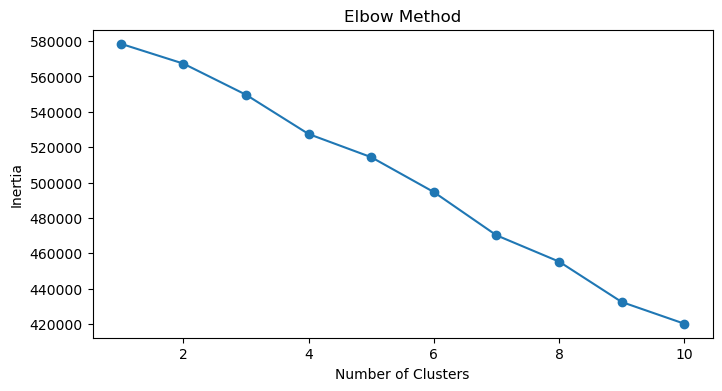

In [31]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),inertia,marker='o')

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

# K-means
- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Ïì∞Ïù¥Îäî ÏïåÍ≥†Î¶¨Ï¶ò
- ÏÑ±Îä•Ïù¥ Ï¢ãÎã§

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(scaled_features)

array([[ 9.77035574,  9.37335156,  7.11223627],
       [ 9.61775476,  9.10594649,  6.93287815],
       [ 9.4680056 ,  8.69785123,  4.43764745],
       ...,
       [15.00290398, 14.29381161, 12.24610913],
       [12.56963926, 11.69379813,  9.11233533],
       [15.16739442, 14.51212274, 12.41046623]])

In [33]:
# kmenas = KMeans(n_clusters=3)
# kmeans = KMeans(n_clusters=i)
# kmeans.fit(scaled_features)
# inertia.append(kmeans.inertia_)

In [36]:
kmeans = KMeans(n_clusters=6,random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(scaled_features)
df_encoded['cluster']

0        3
1        3
5        3
6        3
7        3
        ..
20345    3
20356    3
20361    3
20362    3
20363    3
Name: cluster, Length: 10713, dtype: int32

In [35]:
scaled_features
# Î™áÎ≤à Ïß∏ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ìè¨Ìï®ÎèºÏûàÎäîÏßÄ ÎÇòÏò®Îã§.

array([[-0.25097286,  0.78706603,  1.78001261, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586,  0.63519211, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       ...,
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [-0.25097286, -0.61473586, -1.65444889, ..., -0.25352668,
        -0.13580434, -0.1046255 ],
       [ 2.69068163, -0.61473586, -0.50962839, ..., -0.25352668,
        -0.13580434, -0.1046255 ]])

In [37]:
df_encoded

sweet  acidity  body  tannin   price  year   ml  nation_Argentina  \
0          1        4     5       4  220000  2014  750               0.0   
1          1        3     4       4  110000  2016  750               0.0   
5          1        3     2       3   21000  2011  750               0.0   
6          1        4     2       1   21000  2010  750               0.0   
7          1        3     2       3   19000  2017  750               0.0   
...      ...      ...   ...     ...     ...   ...  ...               ...   
20345      1        4     3       3  109000  2017  750               0.0   
20356      1        4     2       1   40000  2020  750               0.0   
20361      1        3     2       1   40000  2020  750               0.0   
20362      1        3     2       1   40000  2020  750               0.0   
20363      3        3     3       1   55000  2019  750               0.0   

       nation_Australia  nation_Austria  nation_Bulgaria  nation_Canada  \
0                   0.0             0.0              0.0            0.0   
1                   0.0             0.0              0.0            0.0   
5                   0.0             0.0              0.0            0.0   
6                   0.0             0.0              0.0            0.0   
7                   0.0             0.0              0.0            0.0   
...                 ...             ...              ...            ...   
20345               0.0             0.0              0.0            0.0   
20356               0.0             0.0              0.0            0.0   
20361               0.0             0.0              0.0            0.0   
20362               0.0             0.0              0.0            0.0   
20363               0.0             0.0              0.0            0.0   

       nation_Chile  nation_France  nation_Germany  nation_Greece  \
0               1.0            0.0             0.0            0.0   
1               1.0            0.0             0.0            0.0   
5               0.0            1.0             0.0            0.0   
6               0.0            1.0             0.0            0.0   
7               0.0            1.0             0.0            0.0   
...             ...            ...             ...            ...   
20345           0.0            1.0             0.0            0.0   
20356           1.0            0.0             0.0            0.0   
20361           0.0            0.0             0.0            0.0   
20362           0.0            0.0             0.0            0.0   
20363           0.0            0.0             0.0            0.0   

       nation_Hungary  nation_Italy  nation_Korea  nation_Moldova  \
0                 0.0           0.0           0.0             0.0   
1                 0.0           0.0           0.0             0.0   
5                 0.0           0.0           0.0             0.0   
6                 0.0           0.0           0.0             0.0   
7                 0.0           0.0           0.0             0.0   
...               ...           ...           ...             ...   
20345             0.0           0.0           0.0             0.0   
20356             0.0           0.0           0.0             0.0   
20361             0.0           0.0           0.0             0.0   
20362             0.0           0.0           0.0             0.0   
20363             0.0           0.0           0.0             0.0   

       nation_New Zealand  nation_Others  nation_Portugal  nation_Romania  \
0                     0.0            0.0              0.0             0.0   
1                     0.0            0.0              0.0             0.0   
5                     0.0            0.0              0.0             0.0   
6                     0.0            0.0              0.0             0.0   
7                     0.0            0.0              0.0             0.0   
...                   ...            ...              ...             ...

In [38]:
# PriceÎ•º Î∫Ä xÍ∞íÎì§ÏùÑ Ïä§ÌÉ†Îã§Îìú Ïä§ÏºÄÏùºÎßÅÌïòÏó¨ Î™®Îç∏Ïóê Ïûò Ï†ÅÏö©ÏãúÌÇ§Î†§Í≥† ÎπºÎÖº Í≤É.
# predictÎäî ÏõêÎûò df ÏõêÎ≥∏ Ï§ë clusterÎùºÎäî Ïª¨ÎüºÏóê ÎÑ£ÏúºÎ©¥ ÎêúÎã§.

# ÏÑ†ÌòïÌöåÍ∑Ä
- ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïà´Ïûê ÎßàÎã§ Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î∂ÑÎ∞∞ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Íµ∞ÏßëÎßàÎã§Ïùò ÏÑ†ÌòïÌöåÍ∑ÄÏóêÏÑú Î™®Îç∏Ïùò Í≤∞Í≥ºÍ∞íÏùÑ Î≥¥Í≥†Ïã∂Îã§.

In [39]:
# Î™®Îç∏ ÏÑ†Ïñ∏
# PolynomialÏùÄ Îã§Ï∞®ÌöåÍ∑Ä.x^2ÍπåÏßÄ Îì§Ïñ¥Í∞ÑÎã§.
# Î¶øÏßÄÏôÄ ÎùºÏèòÎäî Ï†ïÍ∑úÌôî ÌäπÏÑ±. Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ ÌåêÎã®Ìï† Îïå Ìé∏ÌïòÎã§.
# Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï : Îî•Îü¨ÎãùÏùÑ ÌôúÏö©Ìïú ÏÑ†ÌòïÌöåÍ∑ÄÏãù
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'ElasticNet' : ElasticNet(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'PolynomialRegression' : make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
}

In [40]:
X = scaled_features
y = df_encoded['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('ElasticNet', ElasticNet()), ('GradientBoostingRegressor', GradientBoostingRegressor()), ('PolynomialRegression', Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())]))])

In [44]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)
    print(f'{name} R2 : {r2}')
    
# r2Îäî 0 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ñÎäîÎç∞, ÏùåÏàòÍ∞Ä ÎÇòÏôîÎã® Í≤ÉÏùÄ Ï†ÑÌòÄ ÏòàÏ∏°ÌïòÏßÄ Î™ªÌñàÎã§Îäî Ï†ê..

LinearRegression R2 : 0.20266362631067403
Ridge R2 : 0.20253265235487927


/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+13, tolerance: 9.666e+10
  model = cd_fast.enet_coordinate_descent(


Lasso R2 : 0.20253303810668777
ElasticNet R2 : 0.18158930985911326
GradientBoostingRegressor R2 : 0.3322378191302843
PolynomialRegression R2 : -3.8887609768185496e+19


In [45]:
df_encoded.head()

sweet  acidity  body  tannin   price  year   ml  nation_Argentina  \
0      1        4     5       4  220000  2014  750               0.0   
1      1        3     4       4  110000  2016  750               0.0   
5      1        3     2       3   21000  2011  750               0.0   
6      1        4     2       1   21000  2010  750               0.0   
7      1        3     2       3   19000  2017  750               0.0   

   nation_Australia  nation_Austria  nation_Bulgaria  nation_Canada  \
0               0.0             0.0              0.0            0.0   
1               0.0             0.0              0.0            0.0   
5               0.0             0.0              0.0            0.0   
6               0.0             0.0              0.0            0.0   
7               0.0             0.0              0.0            0.0   

   nation_Chile  nation_France  nation_Germany  nation_Greece  nation_Hungary  \
0           1.0            0.0             0.0            0.0             0.0   
1           1.0            0.0             0.0            0.0             0.0   
5           0.0            1.0             0.0            0.0             0.0   
6           0.0            1.0             0.0            0.0             0.0   
7           0.0            1.0             0.0            0.0             0.0   

   nation_Italy  nation_Korea  nation_Moldova  nation_New Zealand  \
0           0.0           0.0             0.0                 0.0   
1           0.0           0.0             0.0                 0.0   
5           0.0           0.0             0.0                 0.0   
6           0.0           0.0             0.0                 0.0   
7           0.0           0.0             0.0                 0.0   

   nation_Others  nation_Portugal  nation_Romania  nation_Slovenia  \
0            0.0              0.0             0.0              0.0   
1            0.0              0.0             0.0              0.0   
5            0.0              0.0             0.0              0.0   
6            0.0              0.0             0.0              0.0   
7            0.0              0.0             0.0              0.0   

   nation_Spain  nation_USA  nation_the Republic of South Africa  type_Etc  \
0           0.0         0.0                                  0.0       0.0   
1           0.0         0.0                                  0.0       0.0   
5           0.0         0.0                                  0.0       0.0   
6           0.0         0.0                                  0.0       0.0   
7           0.0         0.0                                  0.0       0.0   

   type_Fortified  type_Hard  type_Korean  type_Red  type_Rose  \
0             0.0        0.0          0.0       1.0        0.0   
1             0.0        0.0          0.0       1.0        0.0   
5             0.0        0.0          0.0       1.0        0.0   
6             0.0        0.0          0.0       0.0        0.0   
7             0.0        0.0          0.0       1.0        0.0   

   type_Sparkling  type_White  local1_Aconcagua  local1_Bordeaux  \
0             0.0         0.0               0.0              0.0   
1             0.0         0.0               0.0              0.0   
5             0.0         0.0               0.0              1.0   
6             0.0         1.0               0.0              1.0   
7             0.0         0.0               0.0              0.0   

   local1_Bourgogne  local1_California  local1_Central Valley  \
0               0.0                0.0                    0.0   
1               0.0                0.0                    0.0   
5               0.0                0.0                    0.0   
6               0.0                0.0                    0.0   
7               0.0                0.0                    0.0   

   local1_Champagne  local1_Loire  local1_Maipo Valley  local1_Mendoza  \
0               0.0           0.0                  0.0             0.0   
1     

In [46]:
df_encoded['cluster'].unique()

array([3, 0, 1, 5, 4, 2], dtype=int32)

In [50]:
results = []
for cluster in df_encoded['cluster'].unique():
    
    cluster_data = df_encoded[df_encoded['cluster'] == cluster]
    X = cluster_data.drop(['price','cluster'],axis=1)
    y = cluster_data['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    
    cluster_results = {'Cluster':cluster}
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test,y_pred)
        
        cluster_results[f'{name} RMSE'] = rmse
        cluster_results[f'{name} R2'] = r2
    results.append(cluster_results)

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.949e+13, tolerance: 6.524e+10
  model = cd_fast.enet_coordinate_descent(


In [51]:
results

[{'Cluster': 3,
  'LinearRegression RMSE': 234578.4088385203,
  'LinearRegression R2': 0.22118167258362653,
  'Ridge RMSE': 234580.32038666232,
  'Ridge R2': 0.2211689795587234,
  'Lasso RMSE': 234572.65179733885,
  'Lasso R2': 0.22121989975198753,
  'ElasticNet RMSE': 249405.25896142246,
  'ElasticNet R2': 0.11961769646137621,
  'GradientBoostingRegressor RMSE': 211563.17041202373,
  'GradientBoostingRegressor R2': 0.3665093287377862,
  'PolynomialRegression RMSE': 261566.95307643208,
  'PolynomialRegression R2': 0.031664536054276216},
 {'Cluster': 0,
  'LinearRegression RMSE': 374049.4757467758,
  'LinearRegression R2': 0.12568759807110097,
  'Ridge RMSE': 373947.3617781479,
  'Ridge R2': 0.1261649002917975,
  'Lasso RMSE': 374048.1985689977,
  'Lasso R2': 0.12569356867411974,
  'ElasticNet RMSE': 381839.7790302442,
  'ElasticNet R2': 0.08888986410967414,
  'GradientBoostingRegressor RMSE': 372528.0557637166,
  'GradientBoostingRegressor R2': 0.13278554209001148,
  'PolynomialRegress

In [52]:
pd.DataFrame(results)

Cluster  LinearRegression RMSE  LinearRegression R2     Ridge RMSE  \
0        3          234578.408839             0.221182  234580.320387   
1        0          374049.475747             0.125688  373947.361778   
2        1          161086.317726             0.205988  161333.349895   
3        5          163629.455163             0.169137  163609.784415   
4        4           94744.749973            -1.766117   82440.128712   
5        2           98005.228439            -1.168882   61294.667068   

   Ridge R2     Lasso RMSE  Lasso R2  ElasticNet RMSE  ElasticNet R2  \
0  0.221169  234572.651797  0.221220    249405.258961       0.119618   
1  0.126165  374048.198569  0.125694    381839.779030       0.088890   
2  0.203551  161087.557575  0.205976    164874.440527       0.168205   
3  0.169336  163629.461720  0.169136    167350.570753       0.130917   
4 -1.094293   90939.624306 -1.548394     55683.857783       0.044526   
5  0.151635   98009.190948 -1.169058     59160.057135       0.209695   

   GradientBoostingRegressor RMSE  GradientBoostingRegressor R2  \
0                   211563.170412                      0.366509   
1                   372528.055764                      0.132786   
2                   148728.938461                      0.323137   
3                   154898.310657                      0.255439   
4                   111244.637078                     -2.813453   
5                    98426.274251                     -1.187558   

   PolynomialRegression RMSE  PolynomialRegression R2  
0               2.615670e+05             3.166454e-02  
1               3.474962e+12            -7.545858e+13  
2               1.688633e+05             1.274696e-01  
3               4.239879e+05            -4.578451e+00  
4               7.199641e+05            -1.587283e+02  
5               7.945113e+07            -1.425402e+06

In [53]:
pd.DataFrame(results).T

0             1              2  \
Cluster                              3.000000  0.000000e+00       1.000000   
LinearRegression RMSE           234578.408839  3.740495e+05  161086.317726   
LinearRegression R2                  0.221182  1.256876e-01       0.205988   
Ridge RMSE                      234580.320387  3.739474e+05  161333.349895   
Ridge R2                             0.221169  1.261649e-01       0.203551   
Lasso RMSE                      234572.651797  3.740482e+05  161087.557575   
Lasso R2                             0.221220  1.256936e-01       0.205976   
ElasticNet RMSE                 249405.258961  3.818398e+05  164874.440527   
ElasticNet R2                        0.119618  8.888986e-02       0.168205   
GradientBoostingRegressor RMSE  211563.170412  3.725281e+05  148728.938461   
GradientBoostingRegressor R2         0.366509  1.327855e-01       0.323137   
PolynomialRegression RMSE       261566.953076  3.474962e+12  168863.330724   
PolynomialRegression R2              0.031665 -7.545858e+13       0.127470   

                                            3              4             5  
Cluster                              5.000000       4.000000  2.000000e+00  
LinearRegression RMSE           163629.455163   94744.749973  9.800523e+04  
LinearRegression R2                  0.169137      -1.766117 -1.168882e+00  
Ridge RMSE                      163609.784415   82440.128712  6.129467e+04  
Ridge R2                             0.169336      -1.094293  1.516348e-01  
Lasso RMSE                      163629.461720   90939.624306  9.800919e+04  
Lasso R2                             0.169136      -1.548394 -1.169058e+00  
ElasticNet RMSE                 167350.570753   55683.857783  5.916006e+04  
ElasticNet R2                        0.130917       0.044526  2.096952e-01  
GradientBoostingRegressor RMSE  154898.310657  111244.637078  9.842627e+04  
GradientBoostingRegressor R2         0.255439      -2.813453 -1.187558e+00  
PolynomialRegression RMSE       423987.886098  719964.149874  7.945113e+07  
PolynomialRegression R2             -4.578451    -158.728329 -1.425402e+06

In [54]:
# ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÏùÄ Î™®Îç∏(r2, gradientBoosting Îì±) Í∞ñÍ≥† ÏßÄÏßÄÍ≥† Î≥∂Í≥†
# ÏÑ†ÌòïÌöåÍ∑Ä Ìï† Îïå Ï†àÎåÄ yÍ∞íÏùÑ Í±¥ÎìúÎ¶¨Î©¥ Ïïà ÎêòÎäîÎç∞.. Í±¥Îì§Î©¥ ÏÑ±Îä• ÎÜíÏïÑÏßê.

In [55]:
np.log1p(df_encoded['price'])
# ÏõêÎûò Îßå ~ Ïã≠ÎßåÎã®ÏúÑ ÏòÄÎäîÎç∞ Î°úÍ∑∏Ìï®ÏàòÎ°ú ÎàåÎü¨Î≤ÑÎ¶º.
# Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìï¥Ïïº Ìï† Í∞í Î≤îÏúÑÍ∞Ä Ï§ÑÏñ¥Îì§ÏóàÏùå.

0        12.301387
1        11.608245
5         9.952325
6         9.952325
7         9.852247
           ...    
20345    11.599112
20356    10.596660
20361    10.596660
20362    10.596660
20363    10.915107
Name: price, Length: 10713, dtype: float64

In [56]:
df_encoded['price'] = np.log1p(df_encoded['price'])
df_encoded

sweet  acidity  body  tannin      price  year   ml  nation_Argentina  \
0          1        4     5       4  12.301387  2014  750               0.0   
1          1        3     4       4  11.608245  2016  750               0.0   
5          1        3     2       3   9.952325  2011  750               0.0   
6          1        4     2       1   9.952325  2010  750               0.0   
7          1        3     2       3   9.852247  2017  750               0.0   
...      ...      ...   ...     ...        ...   ...  ...               ...   
20345      1        4     3       3  11.599112  2017  750               0.0   
20356      1        4     2       1  10.596660  2020  750               0.0   
20361      1        3     2       1  10.596660  2020  750               0.0   
20362      1        3     2       1  10.596660  2020  750               0.0   
20363      3        3     3       1  10.915107  2019  750               0.0   

       nation_Australia  nation_Austria  nation_Bulgaria  nation_Canada  \
0                   0.0             0.0              0.0            0.0   
1                   0.0             0.0              0.0            0.0   
5                   0.0             0.0              0.0            0.0   
6                   0.0             0.0              0.0            0.0   
7                   0.0             0.0              0.0            0.0   
...                 ...             ...              ...            ...   
20345               0.0             0.0              0.0            0.0   
20356               0.0             0.0              0.0            0.0   
20361               0.0             0.0              0.0            0.0   
20362               0.0             0.0              0.0            0.0   
20363               0.0             0.0              0.0            0.0   

       nation_Chile  nation_France  nation_Germany  nation_Greece  \
0               1.0            0.0             0.0            0.0   
1               1.0            0.0             0.0            0.0   
5               0.0            1.0             0.0            0.0   
6               0.0            1.0             0.0            0.0   
7               0.0            1.0             0.0            0.0   
...             ...            ...             ...            ...   
20345           0.0            1.0             0.0            0.0   
20356           1.0            0.0             0.0            0.0   
20361           0.0            0.0             0.0            0.0   
20362           0.0            0.0             0.0            0.0   
20363           0.0            0.0             0.0            0.0   

       nation_Hungary  nation_Italy  nation_Korea  nation_Moldova  \
0                 0.0           0.0           0.0             0.0   
1                 0.0           0.0           0.0             0.0   
5                 0.0           0.0           0.0             0.0   
6                 0.0           0.0           0.0             0.0   
7                 0.0           0.0           0.0             0.0   
...               ...           ...           ...             ...   
20345             0.0           0.0           0.0             0.0   
20356             0.0           0.0           0.0             0.0   
20361             0.0           0.0           0.0             0.0   
20362             0.0           0.0           0.0             0.0   
20363             0.0           0.0           0.0             0.0   

       nation_New Zealand  nation_Others  nation_Portugal  nation_Romania  \
0                     0.0            0.0              0.0             0.0   
1                     0.0            0.0              0.0             0.0   
5                     0.0            0.0              0.0             0.0   
6                     0.0            0.0              0.0             0.0   
7                     0.0            0.0              0.0             0.0   
...                   ...            

In [57]:
results = []
for cluster in df_encoded['cluster'].unique():
    
    cluster_data = df_encoded[df_encoded['cluster'] == cluster]
    X = cluster_data.drop(['price','cluster'],axis=1)
    y = cluster_data['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    
    cluster_results = {'Cluster':cluster}
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test,y_pred)
        
        cluster_results[f'{name} RMSE'] = rmse
        cluster_results[f'{name} R2'] = r2
    results.append(cluster_results)
results
# ÏÑ§Î™ÖÎ†•Ïù¥ 0.6ÍπåÏßÄÎèÑ Ïò¨ÎùºÍ∞ê.

[{'Cluster': 3,
  'LinearRegression RMSE': 0.6514386877584194,
  'LinearRegression R2': 0.5418028475824429,
  'Ridge RMSE': 0.6512506643951486,
  'Ridge R2': 0.5420673063514916,
  'Lasso RMSE': 0.962513850655671,
  'Lasso R2': -0.00027466114285679133,
  'ElasticNet RMSE': 0.958996761739685,
  'ElasticNet R2': 0.007022121795313363,
  'GradientBoostingRegressor RMSE': 0.6078487084796846,
  'GradientBoostingRegressor R2': 0.6010703752577539,
  'PolynomialRegression RMSE': 2.5877146291378734,
  'PolynomialRegression R2': -6.229995949357848},
 {'Cluster': 0,
  'LinearRegression RMSE': 0.8954338556856012,
  'LinearRegression R2': 0.3020509297048498,
  'Ridge RMSE': 0.8953299434644433,
  'Ridge R2': 0.30221290979867144,
  'Lasso RMSE': 1.079166651385947,
  'Lasso R2': -0.013756715393328012,
  'ElasticNet RMSE': 1.0677751844220384,
  'ElasticNet R2': 0.007532352428188838,
  'GradientBoostingRegressor RMSE': 0.8628315660046219,
  'GradientBoostingRegressor R2': 0.35194963173856897,
  'Polynomia

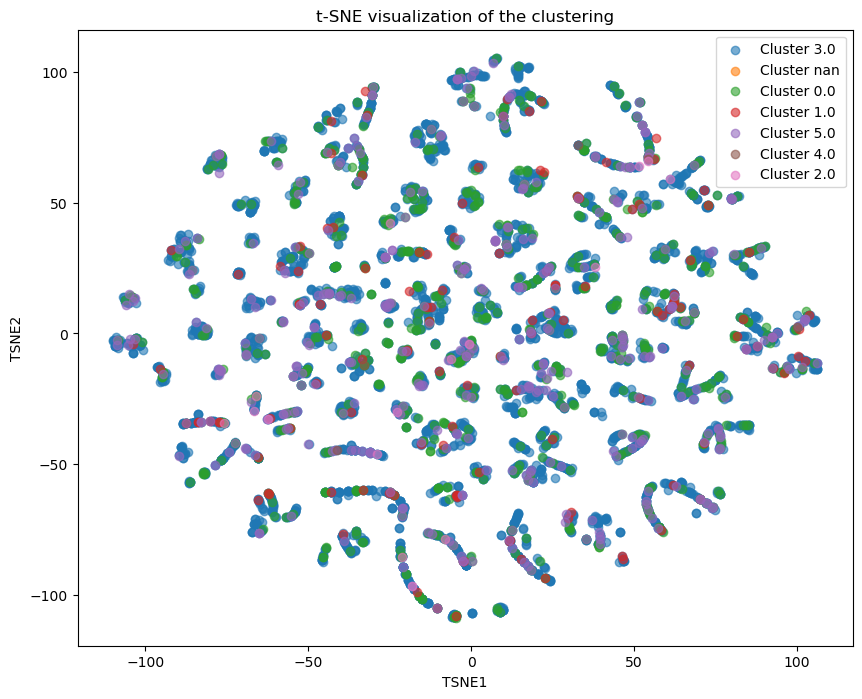

In [58]:
# t-SNE ÏãúÍ∞ÅÌôî
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['cluster'] = df_encoded['cluster']

plt.figure(figsize=(10, 8))
for cluster in df_tsne['cluster'].unique():
    cluster_subset = df_tsne[df_tsne['cluster'] == cluster]
    plt.scatter(cluster_subset['TSNE1'], cluster_subset['TSNE2'], label=f'Cluster {cluster}', alpha=0.6)
plt.title('t-SNE visualization of the clustering')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.show()

- 58Í∞ú Ï∞®ÏõêÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù∏Í∞ÑÏù¥ Î≥º Ïàò ÏûàÎäî ÏãúÍ∞ÅÌôîÎäî Î∂àÍ∞ÄÎä•
- ÏßÅÏ†ë ÎßåÎì† ÏúÑÏóêÍ±¥ Íµ∞ÏßëÏù¥ Ïûò Îêú Í≤ΩÏö∞Îäî ÏïÑÎãàÎã§.
- 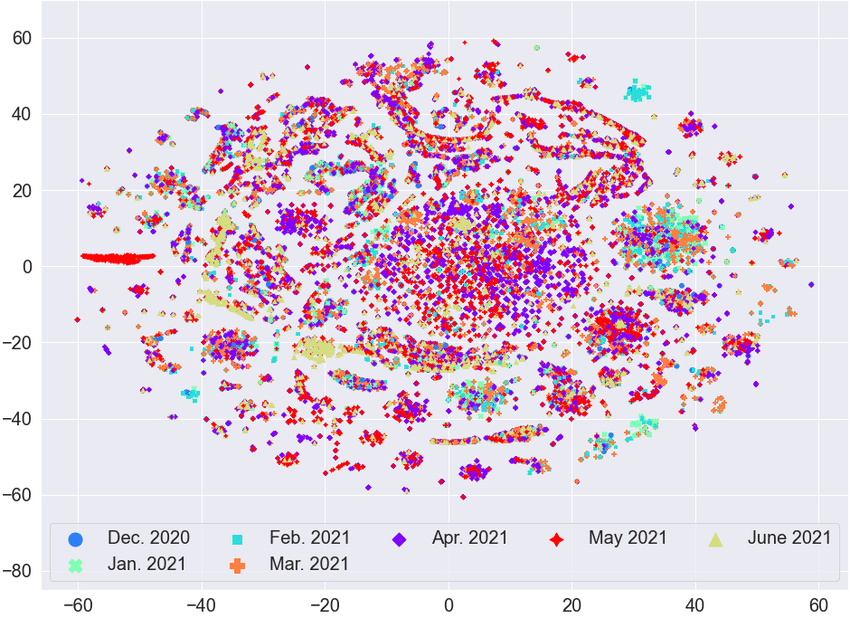